In [1]:
import numpy as np
import matplotlib.pyplot as plt


/home/marcello/anaconda3/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


[[ 0.46347718  0.88610886]
 [-0.88610886  0.46347718]]
-0.9999999999999998 0.9999999999999996


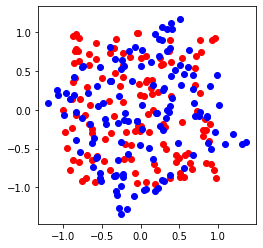

In [2]:

n, m = 128, 2
A = np.random.random((n,m))*2-1

# random special unitary matrix
H = np.random.random((m,m))*2-1
R0,_ = np.linalg.qr(H) # random U
d = np.linalg.det(R0)
R0[0] *= d             # force from U to SU
    
print(R0)
print(d, np.linalg.det(R0))
scatter_factor = 0.1
shifted_factor = 0.1
# new set of position:
# start with B = A, then rotate, scatter and move
B = A 
B = (R0@B.T).T
B += (np.random.random((n,m))*2-1) * scatter_factor
B += (np.random.random(m)*2-1) * shifted_factor

np.set_printoptions(precision=3,suppress=True,linewidth=120)
plt.scatter(A[:,0],A[:,1],c='r')
plt.scatter(B[:,0],B[:,1],c='b')
plt.axis('square')
plt.show()

In [3]:
cA = np.sum(A,axis=0) / n
cB = np.sum(B,axis=0) / n

Bt = B - cB
At = A - cA

[[ 0.467 -0.884]
 [ 0.884  0.467]]


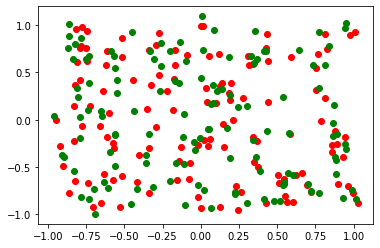

In [4]:

H = At.T@Bt
U,S,VT = np.linalg.svd(H)
d = np.eye(m); #d[m-1,m-1] = np.linalg.det(U@VT.T)
R = U@d@VT

Br = (R@Bt.T).T

print(R)
plt.scatter(At[:,0],At[:,1],c='r')
#plt.scatter(Bt[:,0],Bt[:,1],c='b')
plt.scatter(Br[:,0],Br[:,1],c='g')
plt.show()

In [5]:
AB0 = A-B
ABt = At-Bt
ABr = At-Br
print( np.sum(AB0**2) )
print( np.sum(ABt**2) )
print( np.mean(np.sqrt(ABr**2) ) )

94.8937719480578
93.95684412685847
0.04836312025939481


In [6]:
# Check we did apply a rigid transformation to B
i,j = np.random.choice(n,2)
for i in range(n):
    for j in range(i):
        d0 = B[i]-B[j]
        dt = Bt[i]-Bt[j]
        dr = Br[i]-Br[j]
        
        assert( np.allclose(np.sum(d0**2),np.sum(dt**2)))
        assert( np.allclose(np.sum(d0**2),np.sum(dr**2)))
print('Passed')

Passed


In [7]:
R @ R0

array([[ 1.   ,  0.004],
       [-0.004,  1.   ]])

In [8]:
R - R0.T

array([[ 0.003,  0.002],
       [-0.002,  0.003]])

In [9]:
R.T,R0

(array([[ 0.467,  0.884],
        [-0.884,  0.467]]),
 array([[ 0.463,  0.886],
        [-0.886,  0.463]]))

In [10]:
np.linalg.det(R0)

np.float64(0.9999999999999996)

(array([ 2., 21., 21., 25., 43., 35., 39., 28., 30., 12.]),
 array([-0.139, -0.114, -0.088, -0.063, -0.037, -0.012,  0.013,  0.039,  0.064,  0.09 ,  0.115]),
 <BarContainer object of 10 artists>)

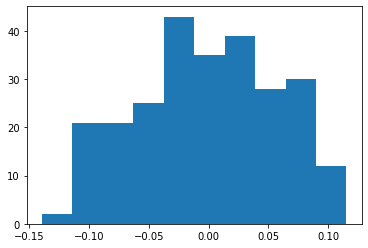

In [11]:
plt.hist( ABr.flatten() )